In [156]:
## imports ##
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
####

## globals ##

nSample=8192
tSample=5e-9
frequency=np.fft.fftshift(np.fft.fftfreq(nSample,tSample))
samples=np.arange(0,nSample,1)
time=samples*tSample
noiseVar=100
fLO=25e9
doPlots=True

##


SNR is:  -18.296392699836524  dB
9.180538234576401
7.441112917143333


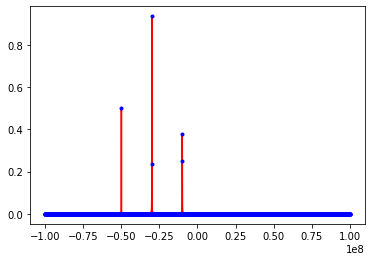

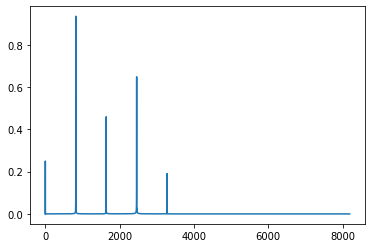

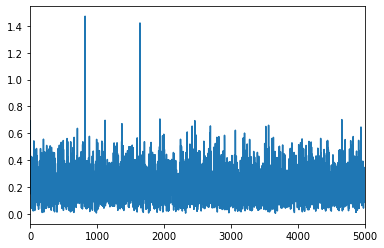

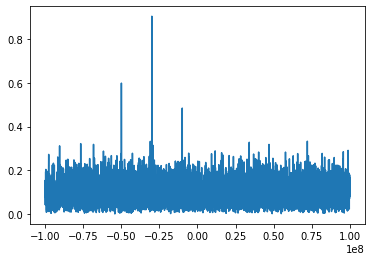

In [158]:
## define signal ##

signalFreqs=np.array([10e6,30e6,50e6])
signalPhases=np.array([.5,0.,5.])
signalAmps=[.5,1,.5]
signalTime=np.zeros(time.size,dtype=np.complex128)
for i in range(signalFreqs.size):
    signalTime+=signalAmps[i]*np.exp(-1j*2*np.pi*(signalFreqs[i]*time-signalPhases[i]))


#if doPlots:
    #fig,axs=plt.subplots()
    #axs.plot(time,signalTime.real,'r')
    #axs.set_xlim(time[0],time[200])
###

## fft ##

signalFreq=np.fft.fftshift(np.fft.fft(signalTime))

#print('Frequencies are: ',frequency[np.where(abs(signalFreq/nSample)>0.2)])

#if doPlots:
    #fig,axs=plt.subplots()
    #axs.plot(frequency,signalFreq.imag/nSample,'r')
    #axs.plot(frequency,signalFreq.real/nSample,'b')
    #axs.set_xlim(time[0],time[200])
    
    #fig,axs=plt.subplots()
    #axs.plot(frequency,abs(signalFreq/nSample),'r')
    #axs.set_xlim(time[0],time[200])
    
####

## Define amplitude template ##

template=np.zeros(signalFreq.size,dtype=np.complex128)
template[np.where(abs(signalFreq/nSample)>0.2)]=signalFreq[np.where(abs(signalFreq/nSample)>0.2)]

if doPlots:
    fig,axs=plt.subplots()
    axs.plot(frequency,abs(signalFreq/nSample),'r')
    axs.plot(frequency,abs(template/nSample),'b.')
    #axs.set_xlim(time[0],time[200])
    
##

## convolve ##

convolution=np.convolve(signalFreq/nSample,template,mode='same')

if doPlots:
    fig,axs=plt.subplots()
    axs.plot(abs(convolution/nSample))
    
####

## do convolution with noise ##

noise=np.random.multivariate_normal(mean=[0,0],cov=np.eye(2)*noiseVar/2,size=nSample)
noise=noise[:,0]+1j*noise[:,1]

noisePower=np.mean(abs(noise)**2)
signalPower=np.mean(abs(signalTime)**2)
snr=signalPower/noisePower

signalTime+=noise

print('SNR is: ',10*np.log10(snr),' dB')

signalFreq=np.fft.fftshift(np.fft.fft(signalTime))

#print(signalFreqs)
#print(np.where(amplitudeConvolution>2)[0])
#print(frequency[np.argmax(abs(signalFreq/nSample))])
print(np.max(abs(signalFreq/nSample))/np.mean(abs(signalFreq/nSample)))
amplitudeConvolution=np.convolve(signalFreq/nSample,amplitudeTemplate,mode='same')
print(np.max(abs(amplitudeConvolution))/np.mean(abs(amplitudeConvolution)))
#print(np.argmax(amplitudeConvolution))
if doPlots:
    fig,axs=plt.subplots()
    axs.plot(abs(amplitudeConvolution))
    axs.set_xlim(0,5000)
    #axs.set_xlim(time[0],time[200])
    fig,axs=plt.subplots()
    axs.plot(frequency,abs(signalFreq/nSample))
      
####



# Optimal Matched Filter

1012.0720893880513


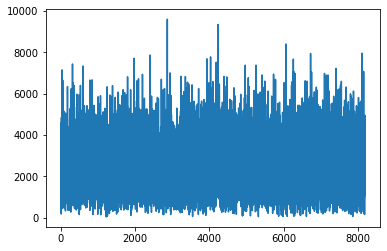

In [118]:
## define signal ##

signalFreqs=np.array([10e6,30e6,50e6])
signalPhases=np.array([.3,0.,0.3])
signalAmps=[1,1,1]
signalTime=np.zeros(time.size,dtype=np.complex128)
for i in range(signalFreqs.size):
    signalTime+=signalAmps[i]*np.exp(-1j*2*np.pi*(signalFreqs[i]*time-signalPhases[i]))

template=signalTime

#if doPlots:
    #fig,axs=plt.subplots()
    #axs.plot(time,signalTime.real,'r')
    #axs.set_xlim(time[0],time[200])
###

## fft ##

#template=np.fft.fftshift(np.fft.fft(signalTime))

## noise ##


noise=np.random.multivariate_normal(mean=[0,0],cov=np.eye(2)*noiseVar/2,size=nSample)
noise=noise[:,0]+1j*noise[:,1]

noisePower=np.mean(abs(noise)**2)
signalPower=np.mean(abs(signalTime)**2)
snr=signalPower/noisePower

signalTime+=noise

##

## filter ##

plt.figure()
#plt.plot(template.real)
plt.plot(abs(np.fft.fftshift(np.fft.fft(signalTime))))

print(np.mean(abs(template*signalTime)))


